## Imports

In [1]:
import gzip
from StringIO import StringIO
from urllib import urlopen

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import collections
from __future__ import division

%matplotlib inline

In [11]:
#url = 'http://snap.stanford.edu/data/facebook_combined.txt.gz'
url = 'https://github.com/AllenDowney/ThinkComplexity2/blob/master/code/facebook_combined.txt.gz?raw=true'
inmemory = StringIO(urlopen(url).read())
with gzip.GzipFile(fileobj=inmemory, mode='rb') as f:
    G = nx.read_edgelist(f, nodetype=int)
    L = len(G.edges())
    N = len(G.nodes())
    print "Number of vertices N =  ", N, "\nNumber of edges L = ", L

Number of vertices N =   4039 
Number of edges L =  88234


Generating a random subgraph of G to test code

In [44]:
with open("facebook/698.edges", mode='r') as g:
    G = nx.read_edgelist(g, nodetype=int)
    subgraphs = {key: len(key.edges()) for key in nx.connected_component_subgraphs(G)}
    G = max(subgraphs, key=subgraphs.get)
    L = len(G.edges())
    N = len(G.nodes())
    print "Number of vertices N =  ", N, "\nNumber of edges L = ", L

Number of vertices N =   61 
Number of edges L =  270


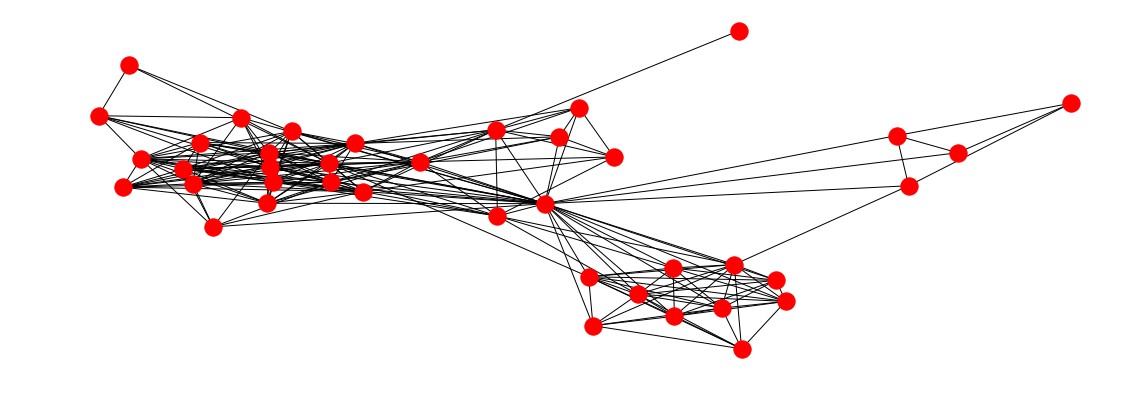

In [94]:
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
nx.draw(G, with_labels=False)
plt.show()

In [95]:
print len(nx.to_undirected(G).edges())

220


### Draw the graph if small enough; for large graphs this may be unfeasible.

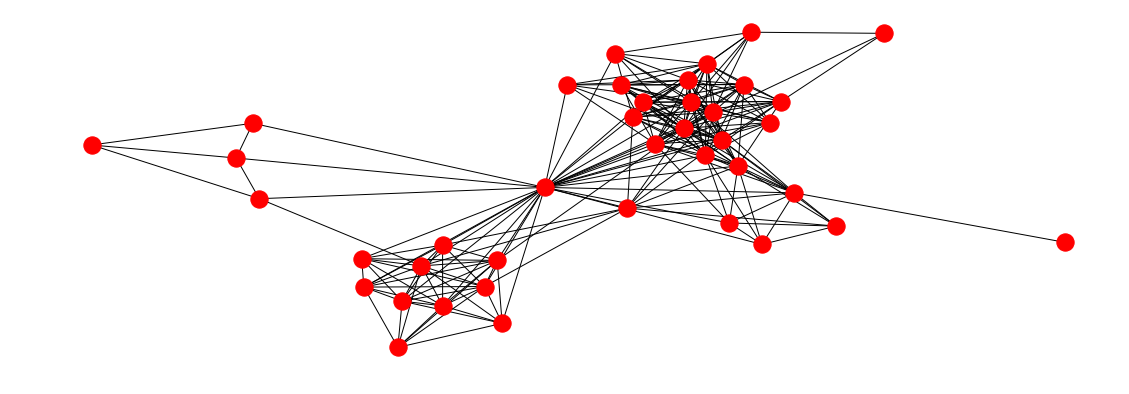

In [96]:
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
nx.draw(G, with_labels=False)
plt.show()

### Draw the histogram of degrees. Compare the distribution with the distribution for a random graph having the same average degree. Discuss the results

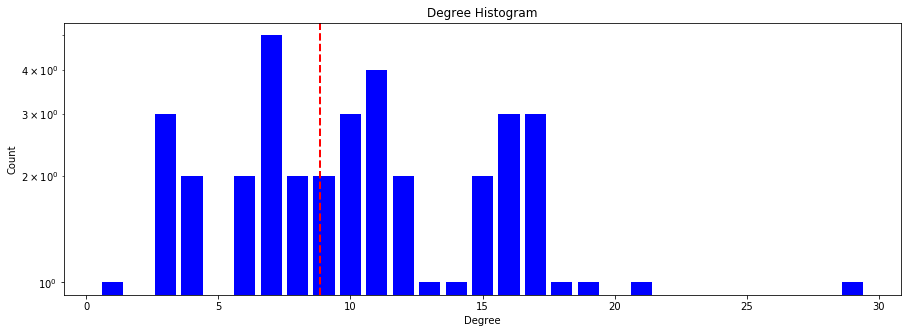

In [97]:

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
#print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

avg = 2*L/N
#fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b', log=True)

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#plt.set_xticks([d + 0.4 for d in deg])
#plt.set_xticklabels(deg)
plt.axvline(avg, color='r', linestyle='dashed', linewidth=2, label='<k>')
plt.show()

Let $$\mathbb{R}$$ be a random graph

In [98]:
avg_degree = 2*L/N #parce que le graphe est non oriente => les liens comptent double {(i,j), (j,i)}
p = avg_degree/(N-1)
print "Average degree <k> = ", avg_degree, "\nProbabilty p = ", p
R = nx.gnm_random_graph(n=N, m=L, seed=42, directed=False)

Average degree <k> =  8.85245901639 
Probabilty p =  0.147540983607


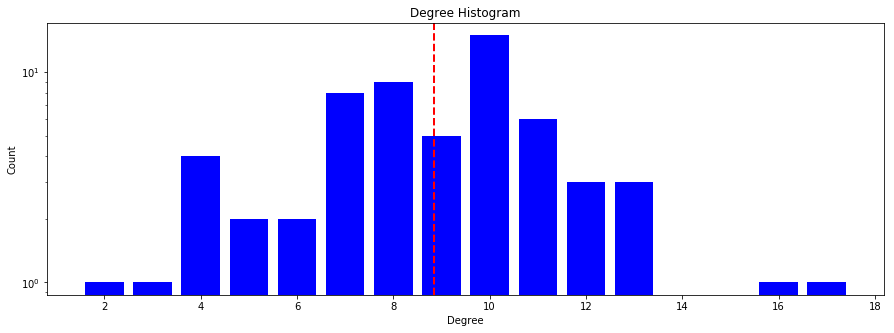

In [99]:
rnd_degree_sequence = sorted([d for n, d in R.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
rnd_degreeCount = collections.Counter(rnd_degree_sequence)
rnd_deg, cnt = zip(*rnd_degreeCount.items())

plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

avg = 2*L/N
#fig, ax = plt.subplots()
plt.bar(rnd_deg, cnt, width=0.80, color='b', log=True)

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d + 0.4 for d in rnd_deg])
#ax.set_xticklabels(rnd_deg)
plt.axvline(avg, color='r', linestyle='dashed', linewidth=2)
plt.show()

### Draw the histogram of clustering coefficient, and the average clustering coefficient. Compare it with the one of a random graph and discuss the results.

0.724919061913


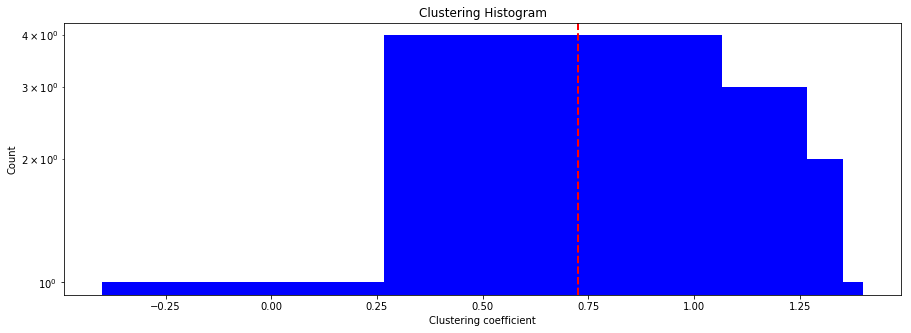

In [100]:
clust_coefficients = nx.clustering(G)
clustering_sequence = sorted(list(clust_coefficients.values()), reverse=True)  # degree sequence
#print "clustering sequence", clustering_sequence
clusteringCount = collections.Counter(clustering_sequence)
clus, cnt = zip(*clusteringCount.items())

avg_clust=sum(clust_coefficients.values()) / len(clust_coefficients)
print avg_clust

plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

#fig, ax = plt.subplots()
plt.bar(clus, cnt, width=0.80, color='b', log=True)

plt.title("Clustering Histogram")
plt.ylabel("Count")
plt.xlabel("Clustering coefficient")
#ax.set_xticks([d + 0.4 for d in clus])
#ax.set_xticklabels(clus)
plt.axvline(avg_clust, color='r', linestyle='dashed', linewidth=2)
plt.show()

0.264994847521


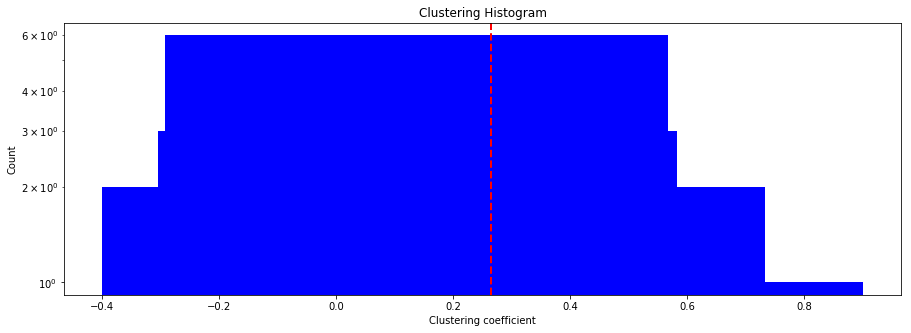

In [101]:
clust_coefficients = nx.clustering(R)
clustering_sequence = sorted(list(clust_coefficients.values()), reverse=True)  # degree sequence
#print "clustering sequence", clustering_sequence
clusteringCount = collections.Counter(clustering_sequence)
clus, cnt = zip(*clusteringCount.items())

avg_clust=sum(clust_coefficients.values()) / len(cnt)
print avg_clust

plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

#fig, ax = plt.subplots()
plt.bar(clus, cnt, width=0.80, color='b', log=True)

plt.title("Clustering Histogram")
plt.ylabel("Count")
plt.xlabel("Clustering coefficient")
#ax.set_xticks([d + 0.4 for d in clus])
#ax.set_xticklabels(clus)
plt.axvline(avg_clust, color='r', linestyle='dashed', linewidth=2)
plt.show()

In [6]:
path = nx.all_pairs_shortest_path(G)
length = nx.all_pairs_shortest_path_length(G)

In [102]:
path = dict(nx.shortest_path_length(G)) 

In [103]:
reform = {(outerKey, innerKey): values for outerKey, innerDict in path.iteritems() for innerKey, values in innerDict.iteritems()}

2.0


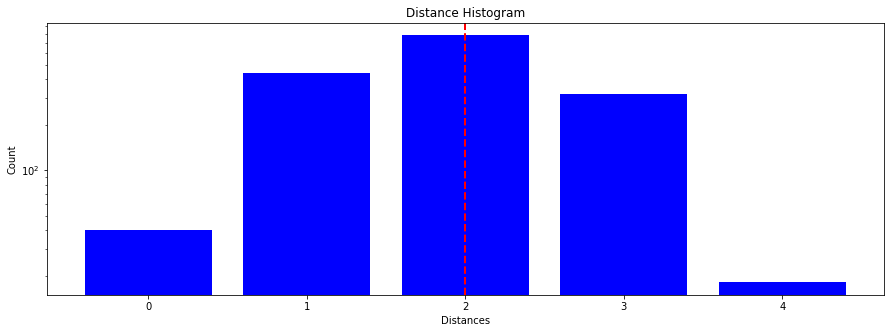

In [104]:
distance = sorted(list(reform.values()), reverse=True)  # degree sequence
#print "clustering sequence", clustering_sequence
distCount = collections.Counter(distance)
dist, cnt = zip(*distCount.items())

avg_dist= np.mean(dist)
print avg_dist

plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

#fig, ax = plt.subplots()
plt.bar(dist, cnt, width=0.80, color='b', log=True)

plt.title("Distance Histogram")
plt.ylabel("Count")
plt.xlabel("Distances")
#ax.set_xticks([d + 0.4 for d in clus])
#ax.set_xticklabels(clus)
plt.axvline(avg_dist, color='r', linestyle='dashed', linewidth=2)
plt.show()

In [105]:

df = pd.Series(reform).rename_axis(['src', 'target']).reset_index(name='path')

In [106]:
with open("distance.csv","w") as f:
    df.to_csv(path_or_buf=f, sep=';', encoding='ascii', index=False)

In [108]:
avg_dist = nx.average_shortest_path_length(G)
avg_dist

1.9448717948717948

In [109]:
diameter = nx.diameter(H)
print(diameter)

4


In [111]:
def community_splits(graph, weight=None):
    """
    Compute the splits for the formation of communities.

    Parameters
    ----------
    graph -  A networkx graph of digraph.
    weight (string) - If None, all edge weights are considered equal.
        Otherwise holds the name of the edge attribute used as weight


    Returns
    -------
    The graph with weak edges removed.


    Usage
    -----
    >>> G = nx.path_graph(10)
    >>> out = GirvanNewman(G)
    >>> comm = out.communities(G, weight=None)
    >>> for x in comm:
            print x
    """

    nConnComp = nx.number_connected_components(graph)
    nComm = nConnComp

    while nComm <= nConnComp:
        betweenness = nx.edge_betweenness_centrality(graph, weight=weight)
        if (len(betweenness.values()) != 0 ):
            max_betweenness = max(betweenness.values())
        else:
            break
        for u,v in betweenness.iteritems():
            if float(v) == max_betweenness:
                # print u,v
                graph.remove_edge(u[0], u[1])
        nComm = nx.number_connected_components(graph)
    return graph